# SVM Iris dataset example

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import project_path
from ciu import determine_ciu


In [2]:
iris = pd.read_csv(os.path.join('data','IRIS.csv'))

In [3]:
# Checking the dataset
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Creating a pairplot to visualize the similarities and especially difference between the species
#sns.pairplot(data=iris, hue='species', palette='Set2')

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
# Separating the independent variables from dependent variables
x=iris.iloc[:,:-1]
y=iris.iloc[:,4]
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.30)

In [6]:
from sklearn.svm import SVC
model=SVC(kernel='linear', probability=True)


In [7]:
model.fit(x_train, y_train)
model.coef_

array([[-0.27649746,  0.32258037, -0.82949237, -0.23041455],
       [-0.0078759 ,  0.1791933 , -0.53803554, -0.29310113],
       [ 0.52821124,  1.1087538 , -1.83555122, -1.9947823 ]])

In [8]:

pred=model.predict(x_test)


In [9]:
feature_names = [
    'sepal_length', 'sepal_width', 'petal_length', 'petal_width'
]


case = x_test.values[0]
example_prediction = model.predict([x_test.values[0]])
example_prediction_prob = model.predict_proba([x_test.values[0]])
prediction_index = 0 if example_prediction_prob[0][0] > 0.5 else 1

print(feature_names)
print(f'Case: {case}; Prediction {example_prediction}; Probability: {example_prediction_prob}')

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Case: [5.4 3.7 1.5 0.2]; Prediction ['Iris-setosa']; Probability: [[0.95781367 0.02982503 0.01236129]]


In [10]:

ciu = determine_ciu(
    x_test.iloc[0, :].to_dict(),
    model.predict_proba,
    {
        'sepal_length': [1.2, 6.2, False],
        'sepal_width': [1.2, 1.3, False],
        'petal_length': [4.4, 6.5, False],
        'petal_width': [2.5, 3.5, False],
    },
    1000,
    prediction_index,
)


sepal_length
c max 0.4325193294543951
c min 5.518748712916641e-07
n 0.9578136742950738
sepal_width
c max 0.0071850579824882755
c min 0.006654941723328206
n 0.9578136742950738
petal_length
c max 0.0009800564611206948
c min 0.0009380736722535085
n 0.9578136742950738
petal_width
c max 0.005030204035165586
c min 0.0031115150319785483
n 0.9578136742950738


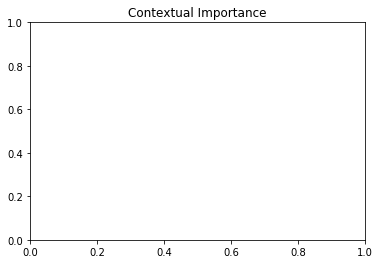

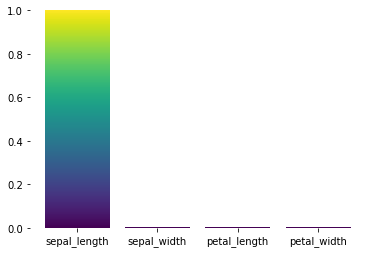

In [11]:
ciu.plot_ci()

c:\users\sulea\desktop\py-ciu\ciu\ciu_object.py:43: RuntimeWarning: overflow encountered in double_scalars
  grad = np.atleast_2d(np.linspace(256 ** height, 1, 256 ** height)).T


OverflowError: cannot convert float infinity to integer

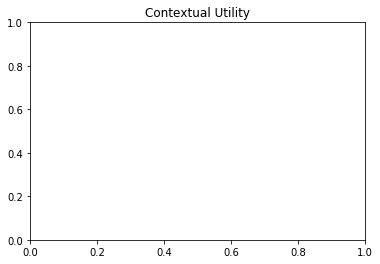

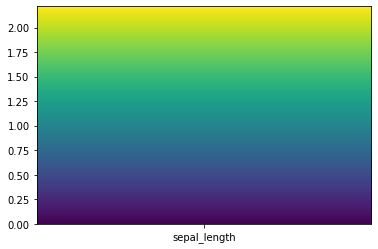

In [12]:
ciu.plot_cu()

In [13]:
print(ciu.text_explain())

['The feature "sepal_length", which is highly important (CI=100.0%), is very typical for its class (CU=221.45%).', 'The feature "sepal_width", which is not important (CI=0.12%), is very typical for its class (CU=179424.55%).', 'The feature "petal_length", which is not important (CI=0.01%), is very typical for its class (CU=2279209.23%).', 'The feature "petal_width", which is not important (CI=0.44%), is very typical for its class (CU=49758.05%).']
